In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'elephant.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

Using TensorFlow backend.


In [2]:
features.shape

(1, 7, 7, 512)

In [3]:
import matplotlib.pyplot as plt
plt.imshow(features[0,:,:,3])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [5]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(input=base_model.input,output=base_model.get_layer("block1_conv2").output)
img_path = 'elephant.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

/home/csuhan/.conda/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


In [6]:
features.shape

(1, 224, 224, 64)

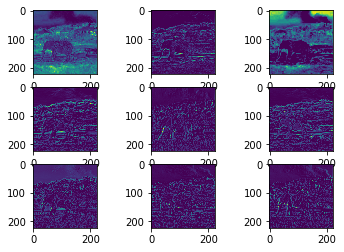

In [7]:
import matplotlib.pyplot as plt
plt.figure(1)
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(features[0,:,:,np.random.randint(64)])
plt.show()

In [8]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import cv2

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(input=base_model.input,output=base_model.get_layer("block4_pool").output)

img = cv2.imread("20150102.tif")
img224 = cv2.resize(img,(224,224))
#img_path = 'elephant.png'
x = np.expand_dims(img224, axis=0)
x = preprocess_input(x)

features = model.predict(x)

/home/csuhan/.conda/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  if __name__ == '__main__':


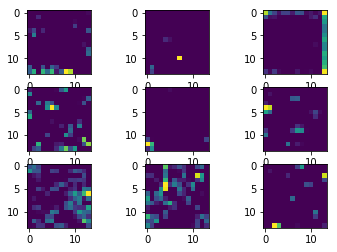

In [9]:
import matplotlib.pyplot as plt
plt.figure(1)
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(features[0,:,:,np.random.randint(64)])
plt.show()